In [153]:
%load_ext autoreload
%autoreload 2
import torch
from Dreamers.models.transformers.blocks import MultiHeadAttention

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
n_dim = 128
n_heads = 8
attention = MultiHeadAttention(n_dim, n_heads, qk_norm=True)
x = torch.rand(32, 16, n_dim)
Y = attention(x, x, x)

In [152]:
attention.state_dict()['W_k.weight']

tensor([[-0.0003, -0.0697, -0.0497,  ...,  0.0394,  0.0371,  0.0034],
        [-0.0774, -0.0794, -0.0699,  ...,  0.0307,  0.0063,  0.0068],
        [ 0.0296, -0.0363,  0.0381,  ..., -0.0295,  0.0208,  0.0070],
        ...,
        [-0.0345, -0.0329, -0.0861,  ..., -0.0013,  0.0226, -0.0028],
        [ 0.0288,  0.0825, -0.0231,  ...,  0.0157, -0.0479, -0.0239],
        [-0.0430, -0.0454, -0.0303,  ..., -0.0010,  0.0017, -0.0881]])

In [140]:
A.shape

torch.Size([32, 8, 16, 16])

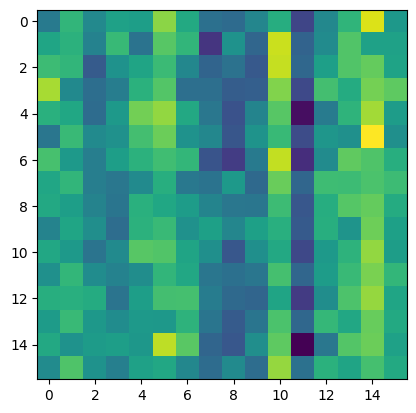

In [147]:
import matplotlib.pyplot as plt
plt.imshow(A[0,0].detach().cpu())

In [113]:
from Dreamers.models.transformers.blocks import RopeEmbedding
T = 2047
D = 4
rope = RopeEmbedding(D, 2048)

In [114]:
import torch

q = torch.zeros(2, 4, T, D)
k = torch.zeros(2, 4, T, D)

q[:, :, :, -4:] = torch.tensor([[1., 0., 0., 1.]])
k[:, :, :, -4:] = torch.tensor([[1., 0., 0., 1.]])
rq, rk = rope(q, k)

(-1.0, 1.0)

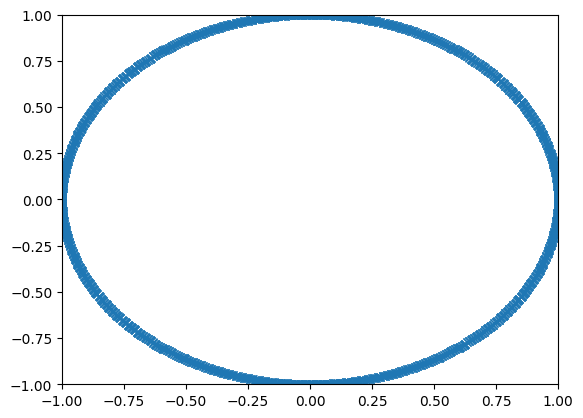

In [103]:
q_odd, q_even = q[..., ::2], q[..., 1::2]
qJ = torch.stack([-q_even, q_odd], dim=-1).reshape_as(q)

q_rot = (q * rope.cos_emb[...,:T,:]) + (qJ * rope.sin_emb[...,:T,:])
plt.plot(q_rot[0,0,:,-4], q_rot[0,0,:,-3], 'x')
# plt.plot(q_rot[0,0,:512,-2], q_rot[0,0,:512,-1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [ ]:
from Dreamers.models.transformers.blocks import RopeEmbedding
from Dreamers.models.transformers.blocks import MultiHeadAttention

n_dim = 128
n_heads = 8
rope = RopeEmbedding(n_dim//n_heads, 2048)
attention = MultiHeadAttention(n_dim, n_heads, rope=rope)
x = torch.rand(32, 16, n_dim)
Y, A = attention(x, x, x)